In [4]:
from policyengine_uk import Microsimulation
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sim = Microsimulation()
total_income = sim.calculate("total_income", 2025, map_to="household").values
constituencies_2010 = pd.read_csv("../constituencies/constituencies_2010.csv")
constituencies_2024 = pd.read_csv("../constituencies/constituencies_2024.csv")

hex_locations_2010 = pd.read_csv("../constituencies/hex_map/hex_map_2010.csv")
hex_locations_2024 = pd.read_csv("../constituencies/hex_map/hex_map_2024.csv")

with h5py.File("../mapping_2010_to_2024/weights.h5", "r") as f:
    weights = f["weight"][:]



# weights = f(weights)
total_income_by_const = np.dot(weights, total_income)
df = constituencies_2010.copy()
df["total_income"] = total_income_by_const
df.sort_values("total_income")

,code,name,total_income
577,S14000027,Na h-Eileanan an Iar,4.134907e+08
630,W07000061,Dwyfor Meirionnydd,7.919527e+08
601,S14000051,Orkney and Shetland,8.279606e+08
626,W07000057,Arfon,8.653685e+08
621,W07000052,Rhondda,8.690867e+08
...,...,...,...
366,E14000896,Richmond Park,9.482040e+09
99,E14000629,Chelsea and Fulham,1.314473e+10
109,E14000639,Cities of London and Westminster,1.509920e+10
197,E14000727,Hampstead and Kilburn,1.520752e+10


In [2]:
mapping_matrix = pd.read_csv("../mapping_2010_to_2024/mapping_matrix.csv")
mapping_matrix = mapping_matrix.set_index(mapping_matrix.columns[0])
# mapping_matrix = mapping_matrix.div(mapping_matrix.sum(axis=1), axis=0)
mapping_matrix = mapping_matrix.div(mapping_matrix.sum(), axis=1)

weights_2024 = mapping_matrix.T.dot(weights)
total_income_by_const = np.dot(weights_2024, total_income)
total_income_df = pd.DataFrame({
    'code': mapping_matrix.columns,
    'total_income': total_income_by_const
})
df_2024_with_names = total_income_df.merge(
    constituencies_2024[['code', 'name']], 
    on='code', 
    how='left'
)
df_2024_with_names = df_2024_with_names.sort_values('code').reset_index(drop=True)
df_2024_with_names.sort_values("total_income")

,code,total_income,name
562,S14000027,4.134907e+08,Na h-Eileanan an Iar
565,S14000051,8.279606e+08,Orkney and Shetland
633,W07000096,9.306969e+08,Dwyfor Meirionnydd
620,W07000083,9.846680e+08,Bangor Aberconwy
42,E14001105,9.880049e+08,Blackpool South
...,...,...,...
202,E14001265,9.685341e+09,Hampstead and Highgate
227,E14001290,1.106248e+10,Holborn and St Pancras
109,E14001172,1.153162e+10,Cities of London and Westminster
97,E14001160,1.164570e+10,Chelsea and Fulham


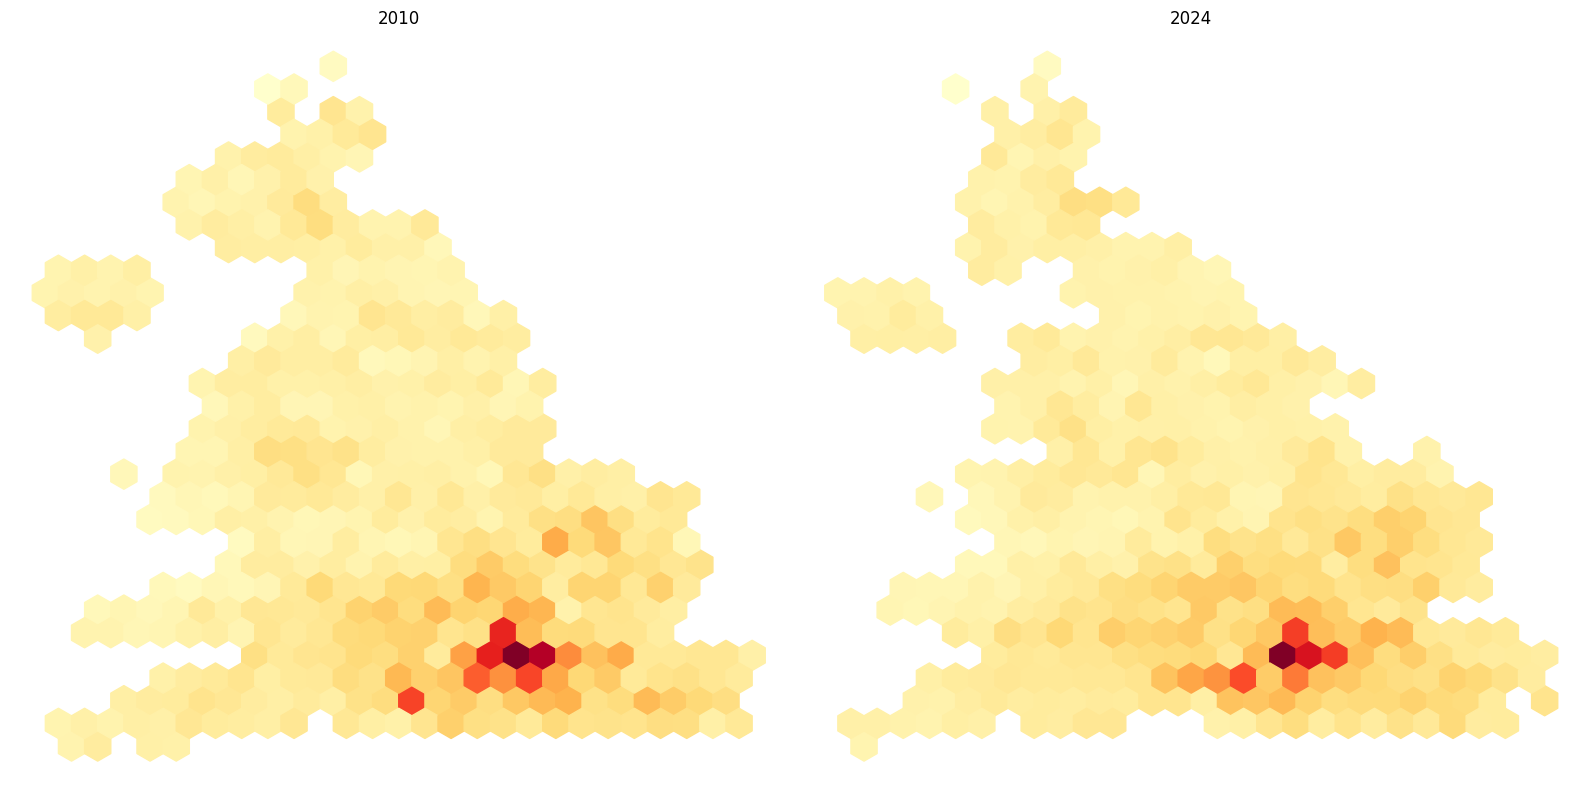

In [38]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 2010 Data - Left subplot
merged_df_2010 = pd.merge(df, hex_locations_2010, on='code', how='inner')
hb1 = ax1.hexbin(
    merged_df_2010['x'], 
    merged_df_2010['y'], 
    C=merged_df_2010['total_income'],  
    gridsize=27,                  
    cmap='YlOrRd',               
    mincnt=1                 
)
ax1.axis('off')
ax1.set_title('2010')

# 2024 Data - Right subplot
merged_df_2024 = pd.merge(df_2024_with_names, hex_locations_2024, on='code', how='inner')
hb2 = ax2.hexbin(
    merged_df_2024['x'], 
    merged_df_2024['y'], 
    C=merged_df_2024['total_income'],  
    gridsize=27,                  
    cmap='YlOrRd',               
    mincnt=1                 
)
ax2.axis('off')
ax2.set_title('2024')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()